# Mod 3 Final Project

## Student Info

- Name: Jamaal Smith
- Cohort: 
- Instructor: James Irving, Phd


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [32]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


Requirement already up-to-date: fsds_100719 in c:\anaconda\envs\learn-env\lib\site-packages (0.7.4)
Requirement not upgraded as not directly required: selenium in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (3.141.0)
Requirement not upgraded as not directly required: scipy in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (1.1.0)
Requirement not upgraded as not directly required: ipywidgets in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (7.5.1)
Requirement not upgraded as not directly required: pandas-profiling in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (2.4.0)
Requirement not upgraded as not directly required: wordcloud in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (1.6.0)
Requirement not upgraded as not directly required: IPython in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (6.5.0)
Requirement not upgraded as not directly required: pyperclip in c:\anaconda\envs\

pexpect 4.6.0 requires ptyprocess>=0.5, which is not installed.
phik 0.9.9 has requirement joblib>=0.14.1, but you'll have joblib 0.14.0 which is incompatible.
astroid 2.3.3 has requirement six~=1.12, but you'll have six 1.11.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# PROJECT

# Hypothesis 1

> Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

- $H_0$: A product's discount has no effect on the quantity of a product in an order
- $H_A$: A product's discount does have an effect on the quantity of a product in an order

In [124]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM OrderDetail""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [125]:
df['Groups'] = df['Discount']>0
df['Groups'] = df['Groups'].map({True:'Discounted',False:'Full Price'})
df['Groups_Number'] = df['Groups'].map({'Discounted': 1, 'Full Price': 0})
df.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Groups,Groups_Number
0,10248/11,10248,11,14.0,12,0.00,Full Price,0
1,10248/42,10248,42,9.8,10,0.00,Full Price,0
2,10248/72,10248,72,34.8,5,0.00,Full Price,0
3,10249/14,10249,14,18.6,9,0.00,Full Price,0
4,10249/51,10249,51,42.4,40,0.00,Full Price,0
5,10250/41,10250,41,7.7,10,0.00,Full Price,0
6,10250/51,10250,51,42.4,35,0.15,Discounted,1
7,10250/65,10250,65,16.8,15,0.15,Discounted,1
8,10251/22,10251,22,16.8,6,0.05,Discounted,1
9,10251/57,10251,57,15.6,15,0.05,Discounted,1


- The data is numerical and we are comparing two groups. Thus, we must employ a 2-sample T-test. TO complete this test, we must make sure that the data meets the following assumptions: no significant outliers, normality and equal variance

## Test for outliers

In [126]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['Groups'].unique():
    groups[grp_name] = df.groupby('Groups').get_group(grp_name)['Quantity']
groups

{'Full Price': 0        12
 1        10
 2         5
 3         9
 4        40
 5        10
 10       20
 13       40
 14       20
 15       42
 16       40
 19       21
 20       20
 21       35
 22       25
 23       30
 24       15
 25       12
 26       25
 27        6
 28       15
 32       10
 33        1
 35       50
 38       20
 39       20
 41       15
 42        2
 44       28
 47       35
        ... 
 2088      4
 2089     10
 2090     15
 2093     30
 2097     12
 2100     55
 2103      3
 2104     42
 2105     35
 2106      9
 2110     20
 2114     20
 2117      8
 2118     40
 2119     22
 2120    130
 2121     10
 2122     20
 2131      4
 2132      1
 2136      1
 2138      4
 2142      2
 2143      1
 2145      3
 2147      2
 2148      2
 2151      1
 2153      4
 2154      2
 Name: Quantity, Length: 1317, dtype: int64, 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
 12      25
 17      15
 18      21
 29      50
 30      65
 31       6
 34

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

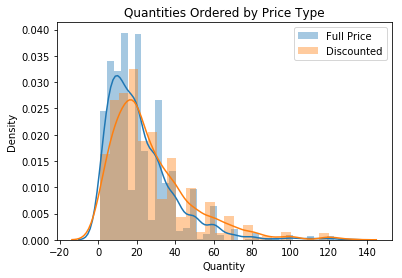

In [127]:
#Visualize the data to get sense of present outlier

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')

In [128]:
from functions import Cohen_d,find_outliers_IQR,find_outliers_Z

In [129]:
#Identifying Outliers

for k,v in groups.items():
    idx_out = find_outliers_Z(v)
    print(f'There are {idx_out} outliers present in {grp_name} using Z-Score')
    groups[k] = v[~idx_out]
    

There are 0       False
1       False
2       False
3       False
4       False
5       False
10      False
13      False
14      False
15      False
16      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
32      False
33      False
35      False
38      False
39      False
41      False
42      False
44      False
47      False
        ...  
2088    False
2089    False
2090    False
2093    False
2097    False
2100    False
2103    False
2104    False
2105    False
2106    False
2110    False
2114    False
2117    False
2118    False
2119    False
2120     True
2121    False
2122    False
2131    False
2132    False
2136    False
2138    False
2142    False
2143    False
2145    False
2147    False
2148    False
2151    False
2153    False
2154    False
Length: 1317, dtype: bool outliers present in Discounted using Z-Score
There are 6       False
7       False
8       False
9       False

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

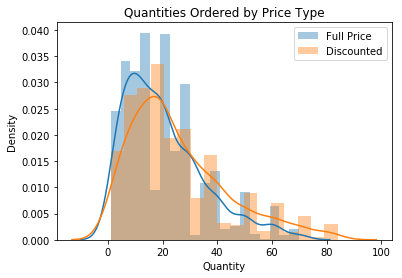

In [130]:
#Replotting of density plot without outliers

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')



## Testing for Normality

In [131]:
import scipy.stats as stats    

In [132]:
#Normalcy test with scipy library
for k,v in groups.items():
    stat,p = stats.normaltest(v)
    print(f' Group {k} Normaltest p-value = {round(p,4)}')
    sig = 'is Not' if p<0.5 else 'is'
    print(f' -The data is {sig} normal')

 Group Full Price Normaltest p-value = 0.0
 -The data is is Not normal
 Group Discounted Normaltest p-value = 0.0
 -The data is is Not normal


In [133]:
#large data sets are ok to be used as long as data set is large
len(groups['Full Price']), len(groups['Discounted'])

(1297, 823)

## Equal Variance

In [134]:
data = []
for k, v in groups.items():
    data.append(v)

stat,p = stats.levene(*data)

print (f'Levene Test for Equal Variance p-value = {round(p,4)}')
sig = 'is Not' if p<0.5 else 'is'
print(f' -The data {sig} equally varied')

Levene Test for Equal Variance p-value = 0.0
 -The data is Not equally varied


- Due to the data not having equal variance, we must use the Welch's test

In [135]:
stat,p = stats.ttest_ind(*data, equal_var=False)
print(f" Welch's t-test p-value is {round(p,4)}")

 Welch's t-test p-value is 0.0


## Effect Size

In [136]:
Cohen_d(*data)

-0.32001140965727837

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = pairwise_tukeyhsd(df['Quantity'],df['Discount'])
model.summary(10)

TypeError: summary() takes 1 positional argument but 2 were given

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



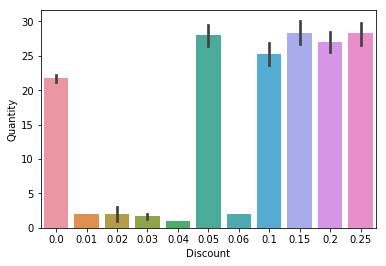

In [138]:
sns.barplot(data=df, x='Discount', y='Quantity',ci=68)

# Hypothesis 2

> Does a product's unit price have a statisticaly significant effect on how many units are kept in stock?

- $H_0$: A product's unit price has no effect on how many units are kept in stock.
- $H_A$: A product's unit price has an effect on how many units are kept in stock.

In [164]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM Product;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


# Hypothesis 3

> Does a employee's date of birth have a statistically significant effect on their hire date?

- $H_0$: An employee's date of birth does not have an effect on their hire date.
- $H_A$: An employee's date of birth does have an effect on their hire date.

In [170]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT LastName,FirstName,BirthDate,HireDate FROM Employee;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,LastName,FirstName,BirthDate,HireDate
0,Davolio,Nancy,1980-12-08,2024-05-01
1,Fuller,Andrew,1984-02-19,2024-08-14
2,Leverling,Janet,1995-08-30,2024-04-01
3,Peacock,Margaret,1969-09-19,2025-05-03
4,Buchanan,Steven,1987-03-04,2025-10-17
